# Simulation of multiple phenotypes given genotypes and covariance
Here we simulate effect size from mixture gaussian.

In [30]:
cwd = path('/home/gaow/Documents/GTExV8/MNM')

## Prior & residuals inventory

In [2]:
import numpy as np
np.random.seed(10086)
P1 = (dict([('identity', np.identity(2)), ('single_1', np.array([[1,0],[0,0]])), ('single_2', np.array([[0,0], [0,1]])), ('all_in', np.ones((2,2)))]),
      [0.5,1],
      [0.9,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02],
      False
     )
# independent effects
P2 = (dict([('identity', np.identity(2))]), [1], [1], False)
# correlated effects
P3 = (dict([('all', np.ones((2,2)) + np.identity(2) / 2)]), [1], [1], False)
S3 = np.ones((2,2))

In [3]:
dat = readRDS('/home/gaow/Documents/GTExV8/Thyroid.Lung.FMO2.filled.rds')
attach(dat)

In [4]:
%get X Y --from R
Y = Y.as_matrix()

Loading required package: feather


## Multivariate simulation

In [5]:
from libgaow.regression_simulate import MMRegressionSimulator as SIM
data = SIM(X)

In [6]:
#data.get_xcorr('/home/gaow/Documents/GTExV8/FMO2.ld.npy')
data.set_xcorr(np.load('/home/gaow/Documents/GTExV8/FMO2.ld.npy'))

In [7]:
data.set_prior(*P3)
data.U = dict([(idx, data.U[key]) for idx, key in enumerate(data.U.keys())])

In [8]:
data.U

{0: array([[ 0.,  0.],
        [ 0.,  0.]]), 1: array([[ 1.5,  1. ],
        [ 1. ,  1.5]])}

In [9]:
data.pi

array([0, 1])

In [10]:
data.generate_B(number_nonzero = 3)

In [11]:
# Separate effects into different LD blocks
indep_snps = data.select_independent_snps()
np.random.shuffle(indep_snps)

Count strong LD
Filter by LD
Done


In [12]:
data.swap_B(indep_snps)

> %preview /home/gaow/Documents/GTExV8/MNM/sim1.b1.png

> /home/gaow/Documents/GTExV8/MNM/sim1.b1.png (88.5 KiB):

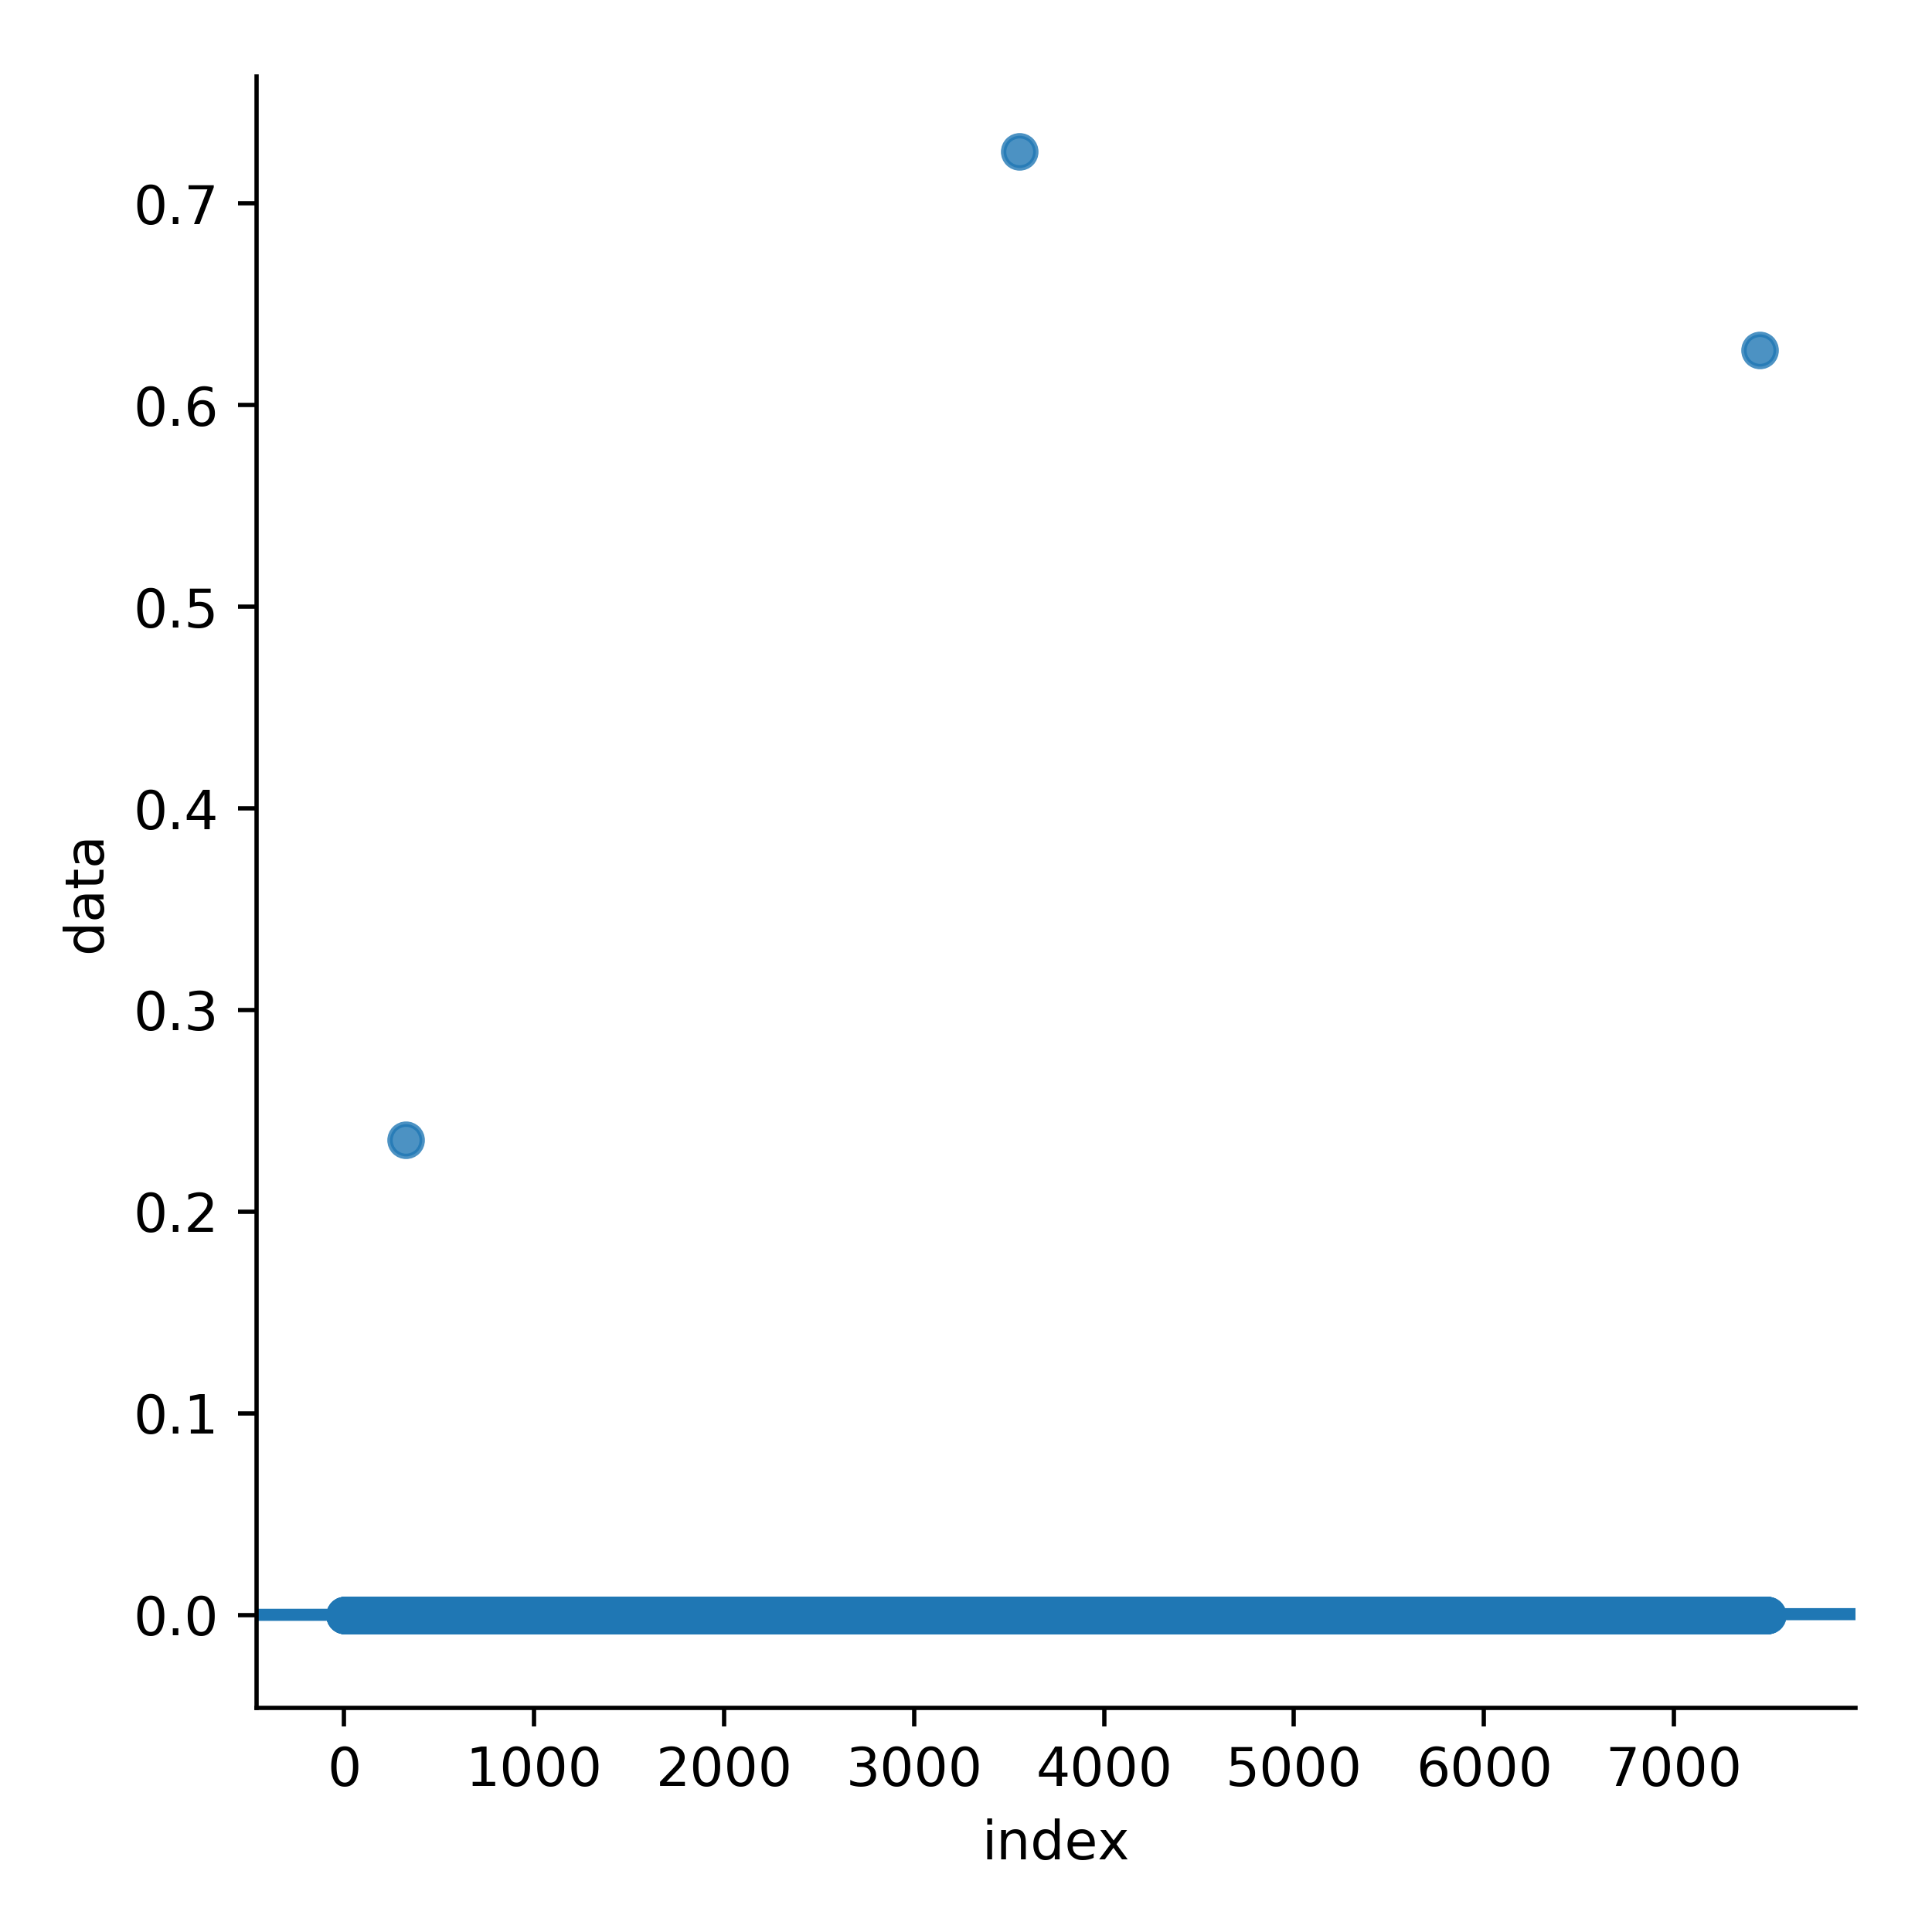

In [28]:
%expand
%preview {cwd}/sim1.b1.png
data.plot_B(data.B[:,0], '{cwd}/sim1.b1.png')

> %preview /home/gaow/Documents/GTExV8/MNM/sim1.b2.png

> /home/gaow/Documents/GTExV8/MNM/sim1.b2.png (86.8 KiB):

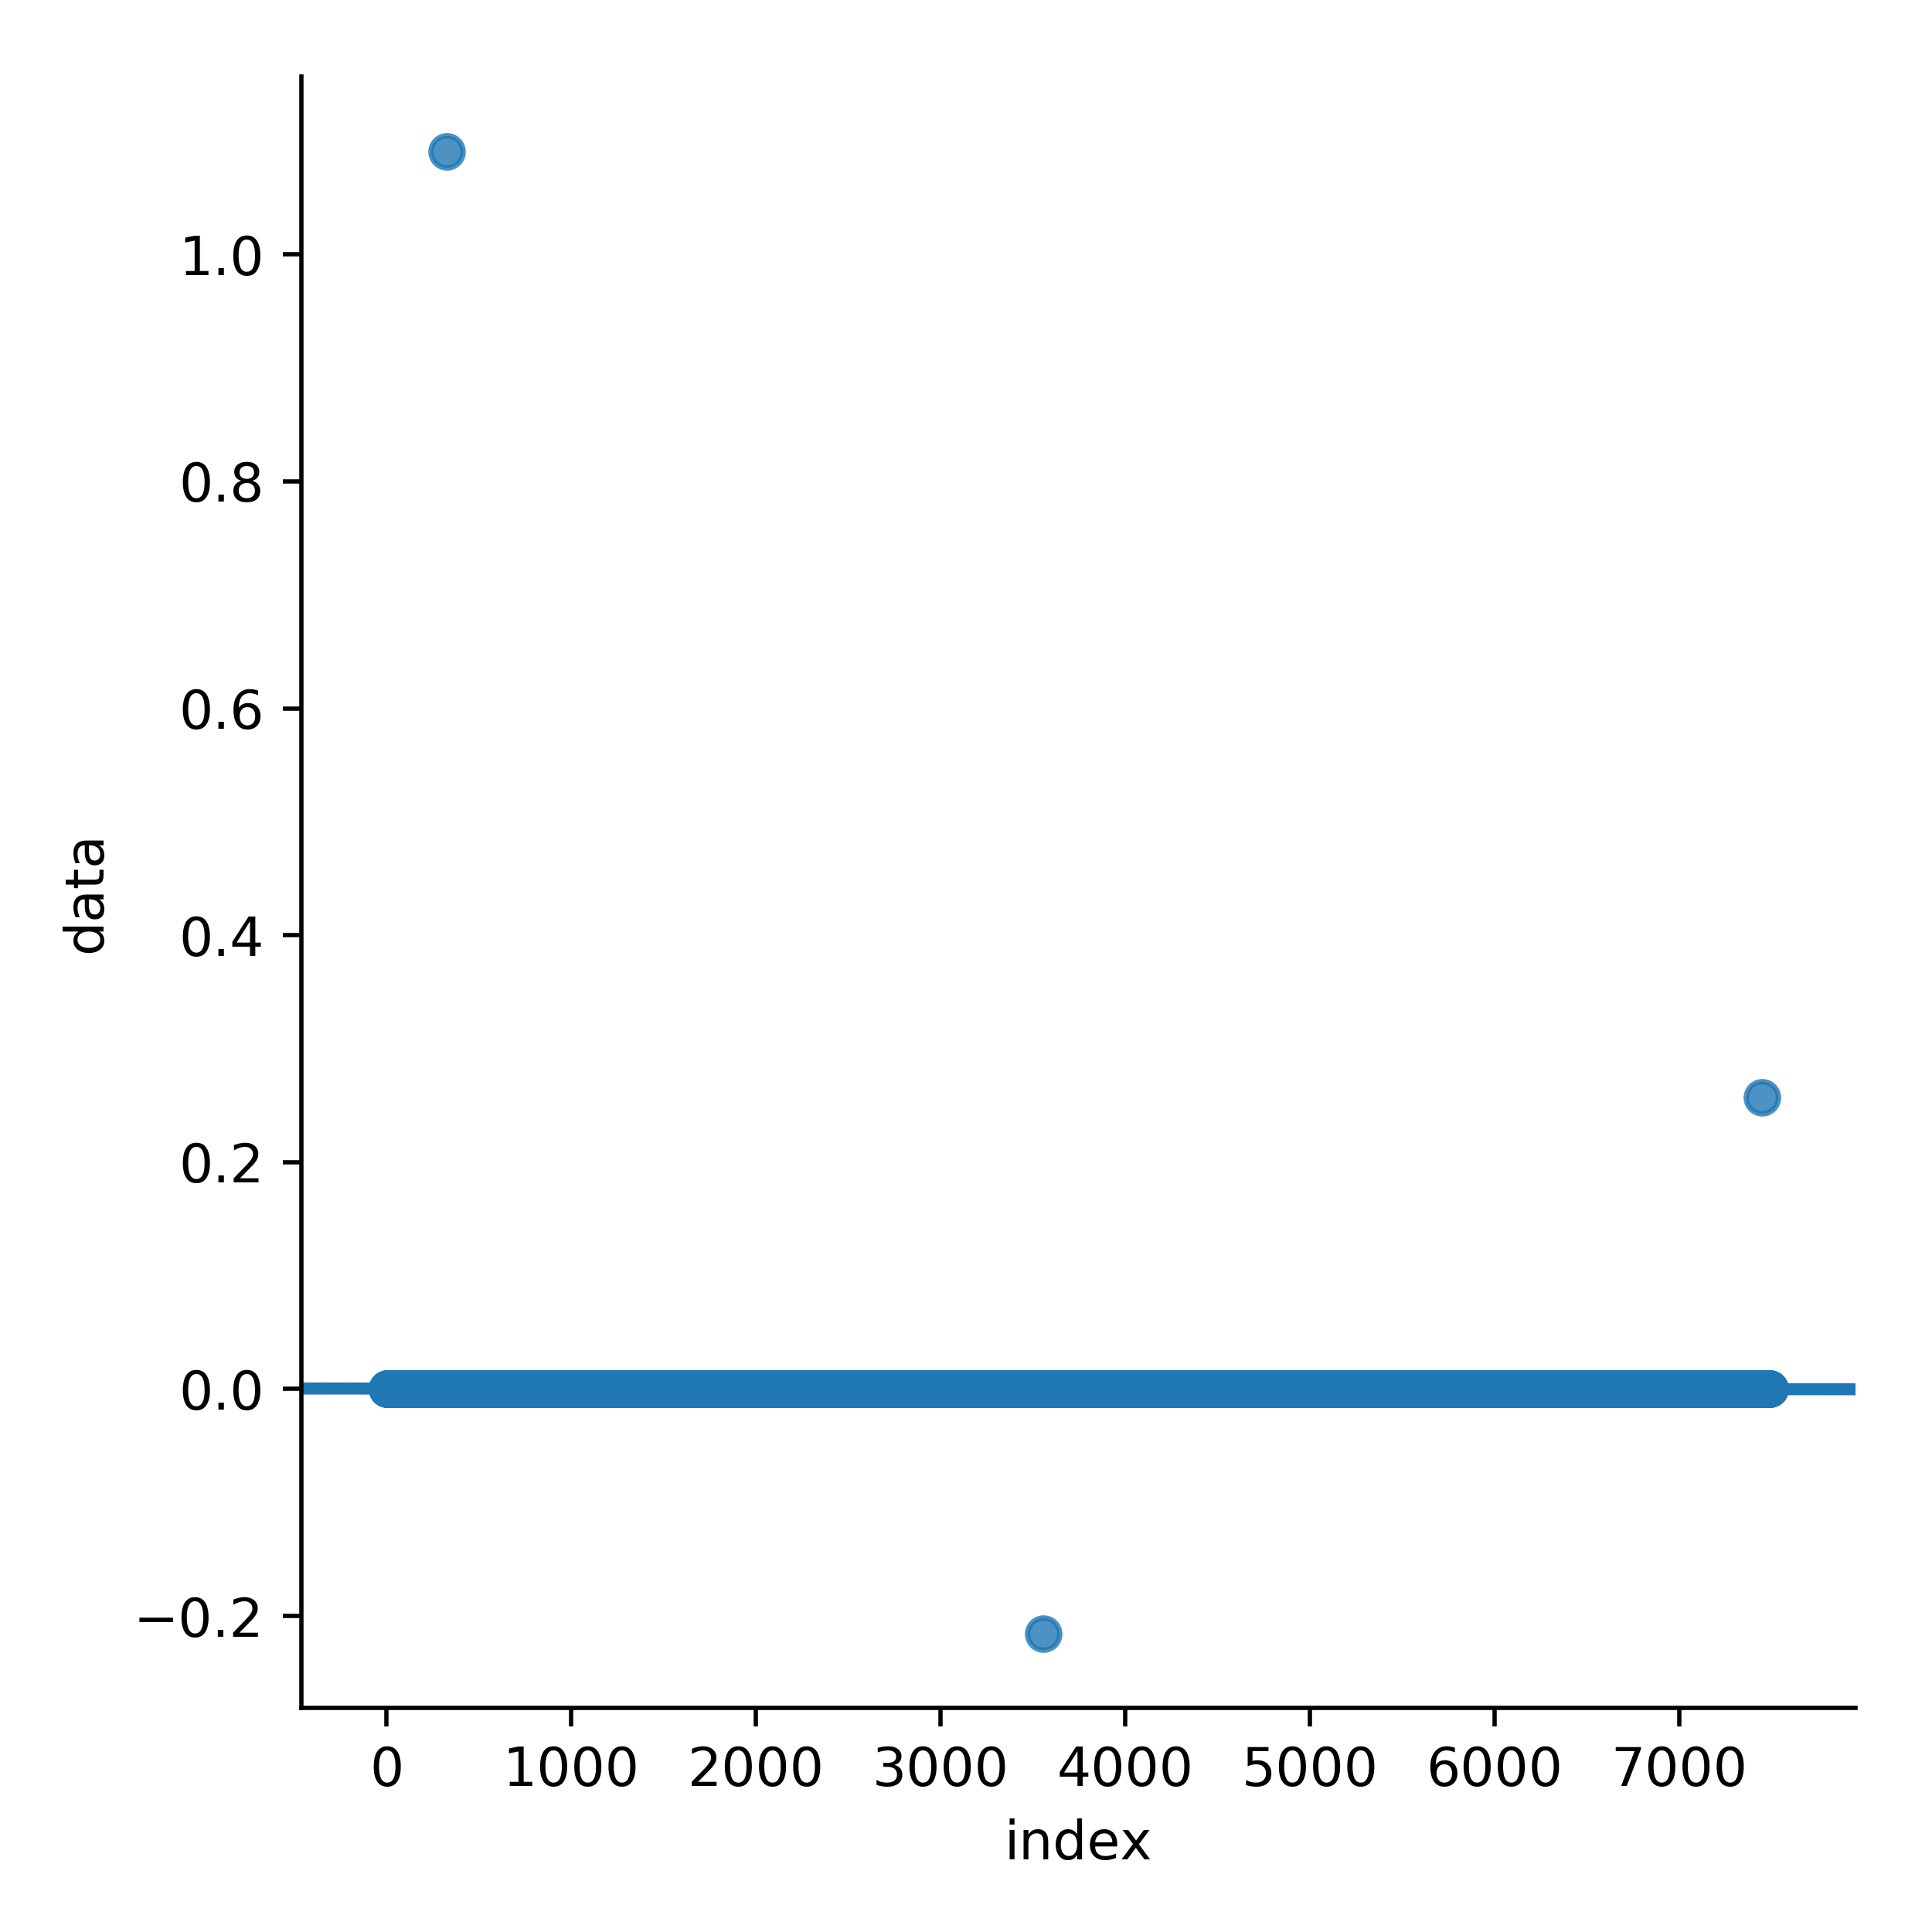

In [29]:
%expand
%preview {cwd}/sim1.b2.png
data.plot_B(data.B[:,1], '{cwd}/sim1.b2.png')

In [15]:
data.generate_Y(np.ones((2,2)))

## M&M analysis

In [16]:
 import warnings
 warnings.filterwarnings('error')

In [22]:
from libgaow.regression_data import MNMASH
model = MNMASH(X=data.X,Y=data.Y)
model.set_prior(*P3)

In [23]:
model.fit(niter=5)

> %preview /home/gaow/Documents/GTExV8/MNM/sim1.bpost1.png

> /home/gaow/Documents/GTExV8/MNM/sim1.bpost1.png (119.6 KiB):

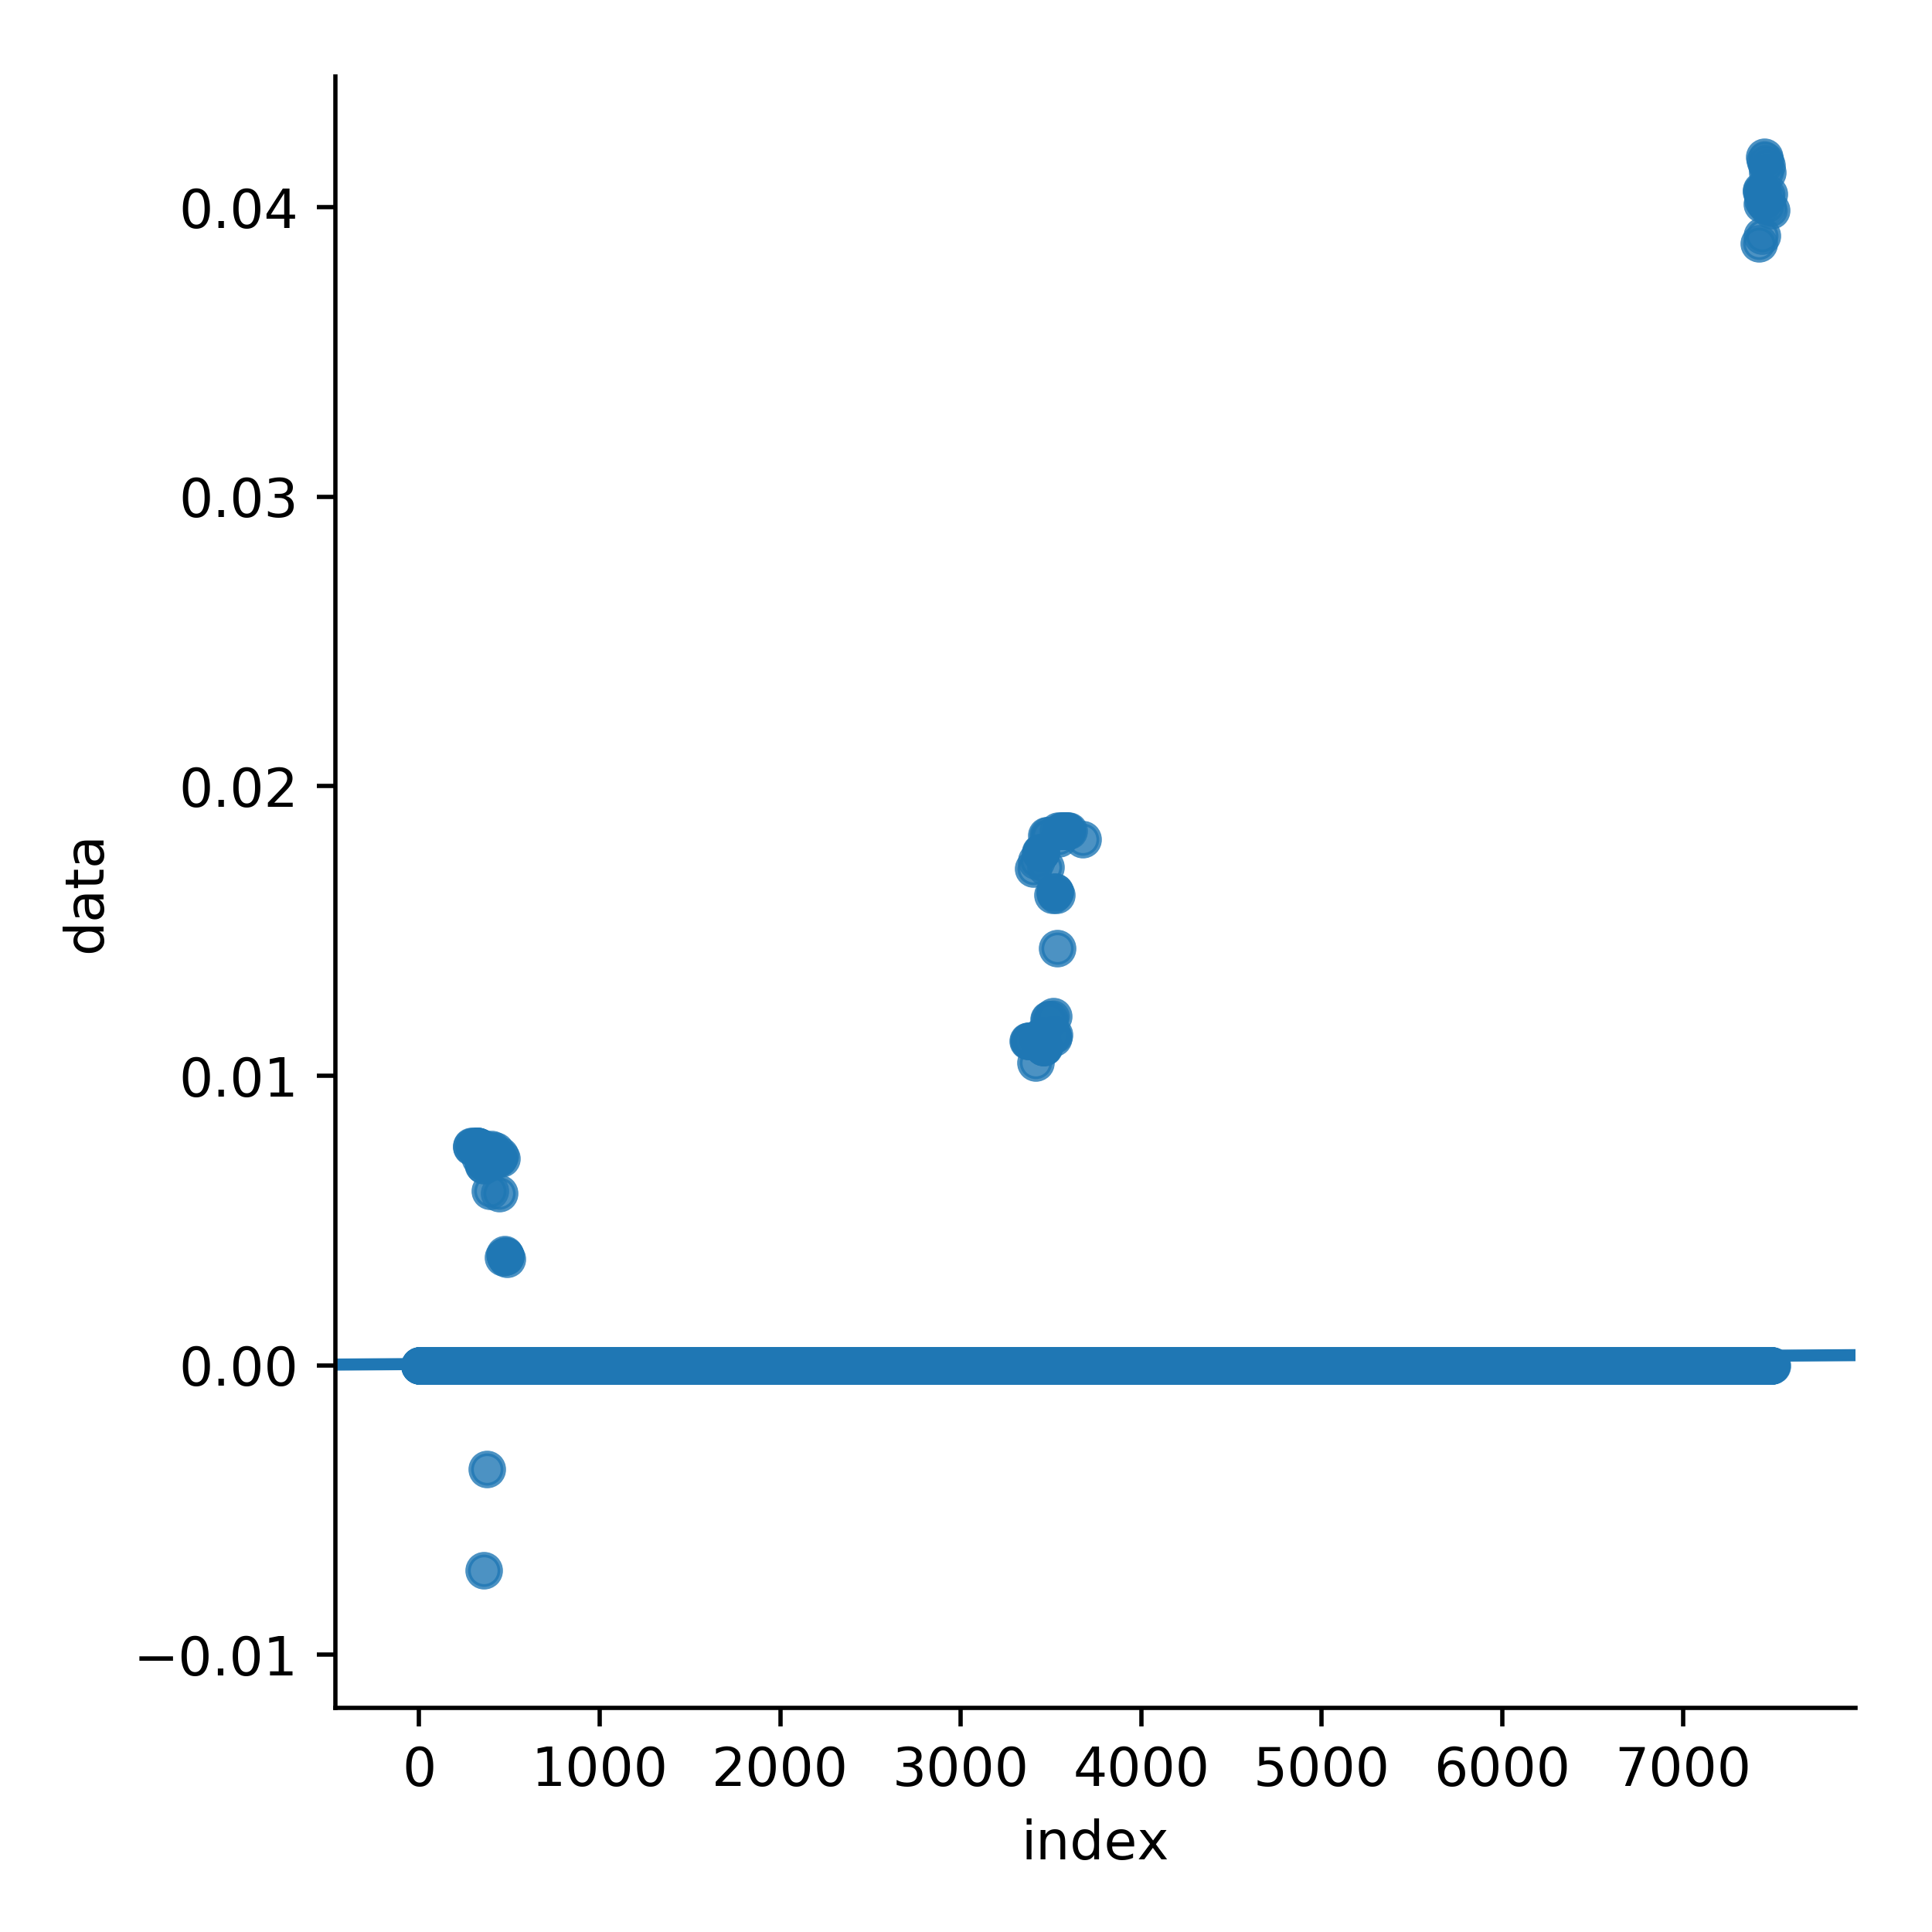

In [26]:
%expand
%preview {cwd}/sim1.bpost1.png
data.plot_B(model.post_mean_mat[:,0], '{cwd}/sim1.bpost1.png')

> %preview /home/gaow/Documents/GTExV8/MNM/sim1.bpost2.png

> /home/gaow/Documents/GTExV8/MNM/sim1.bpost2.png (114.8 KiB):

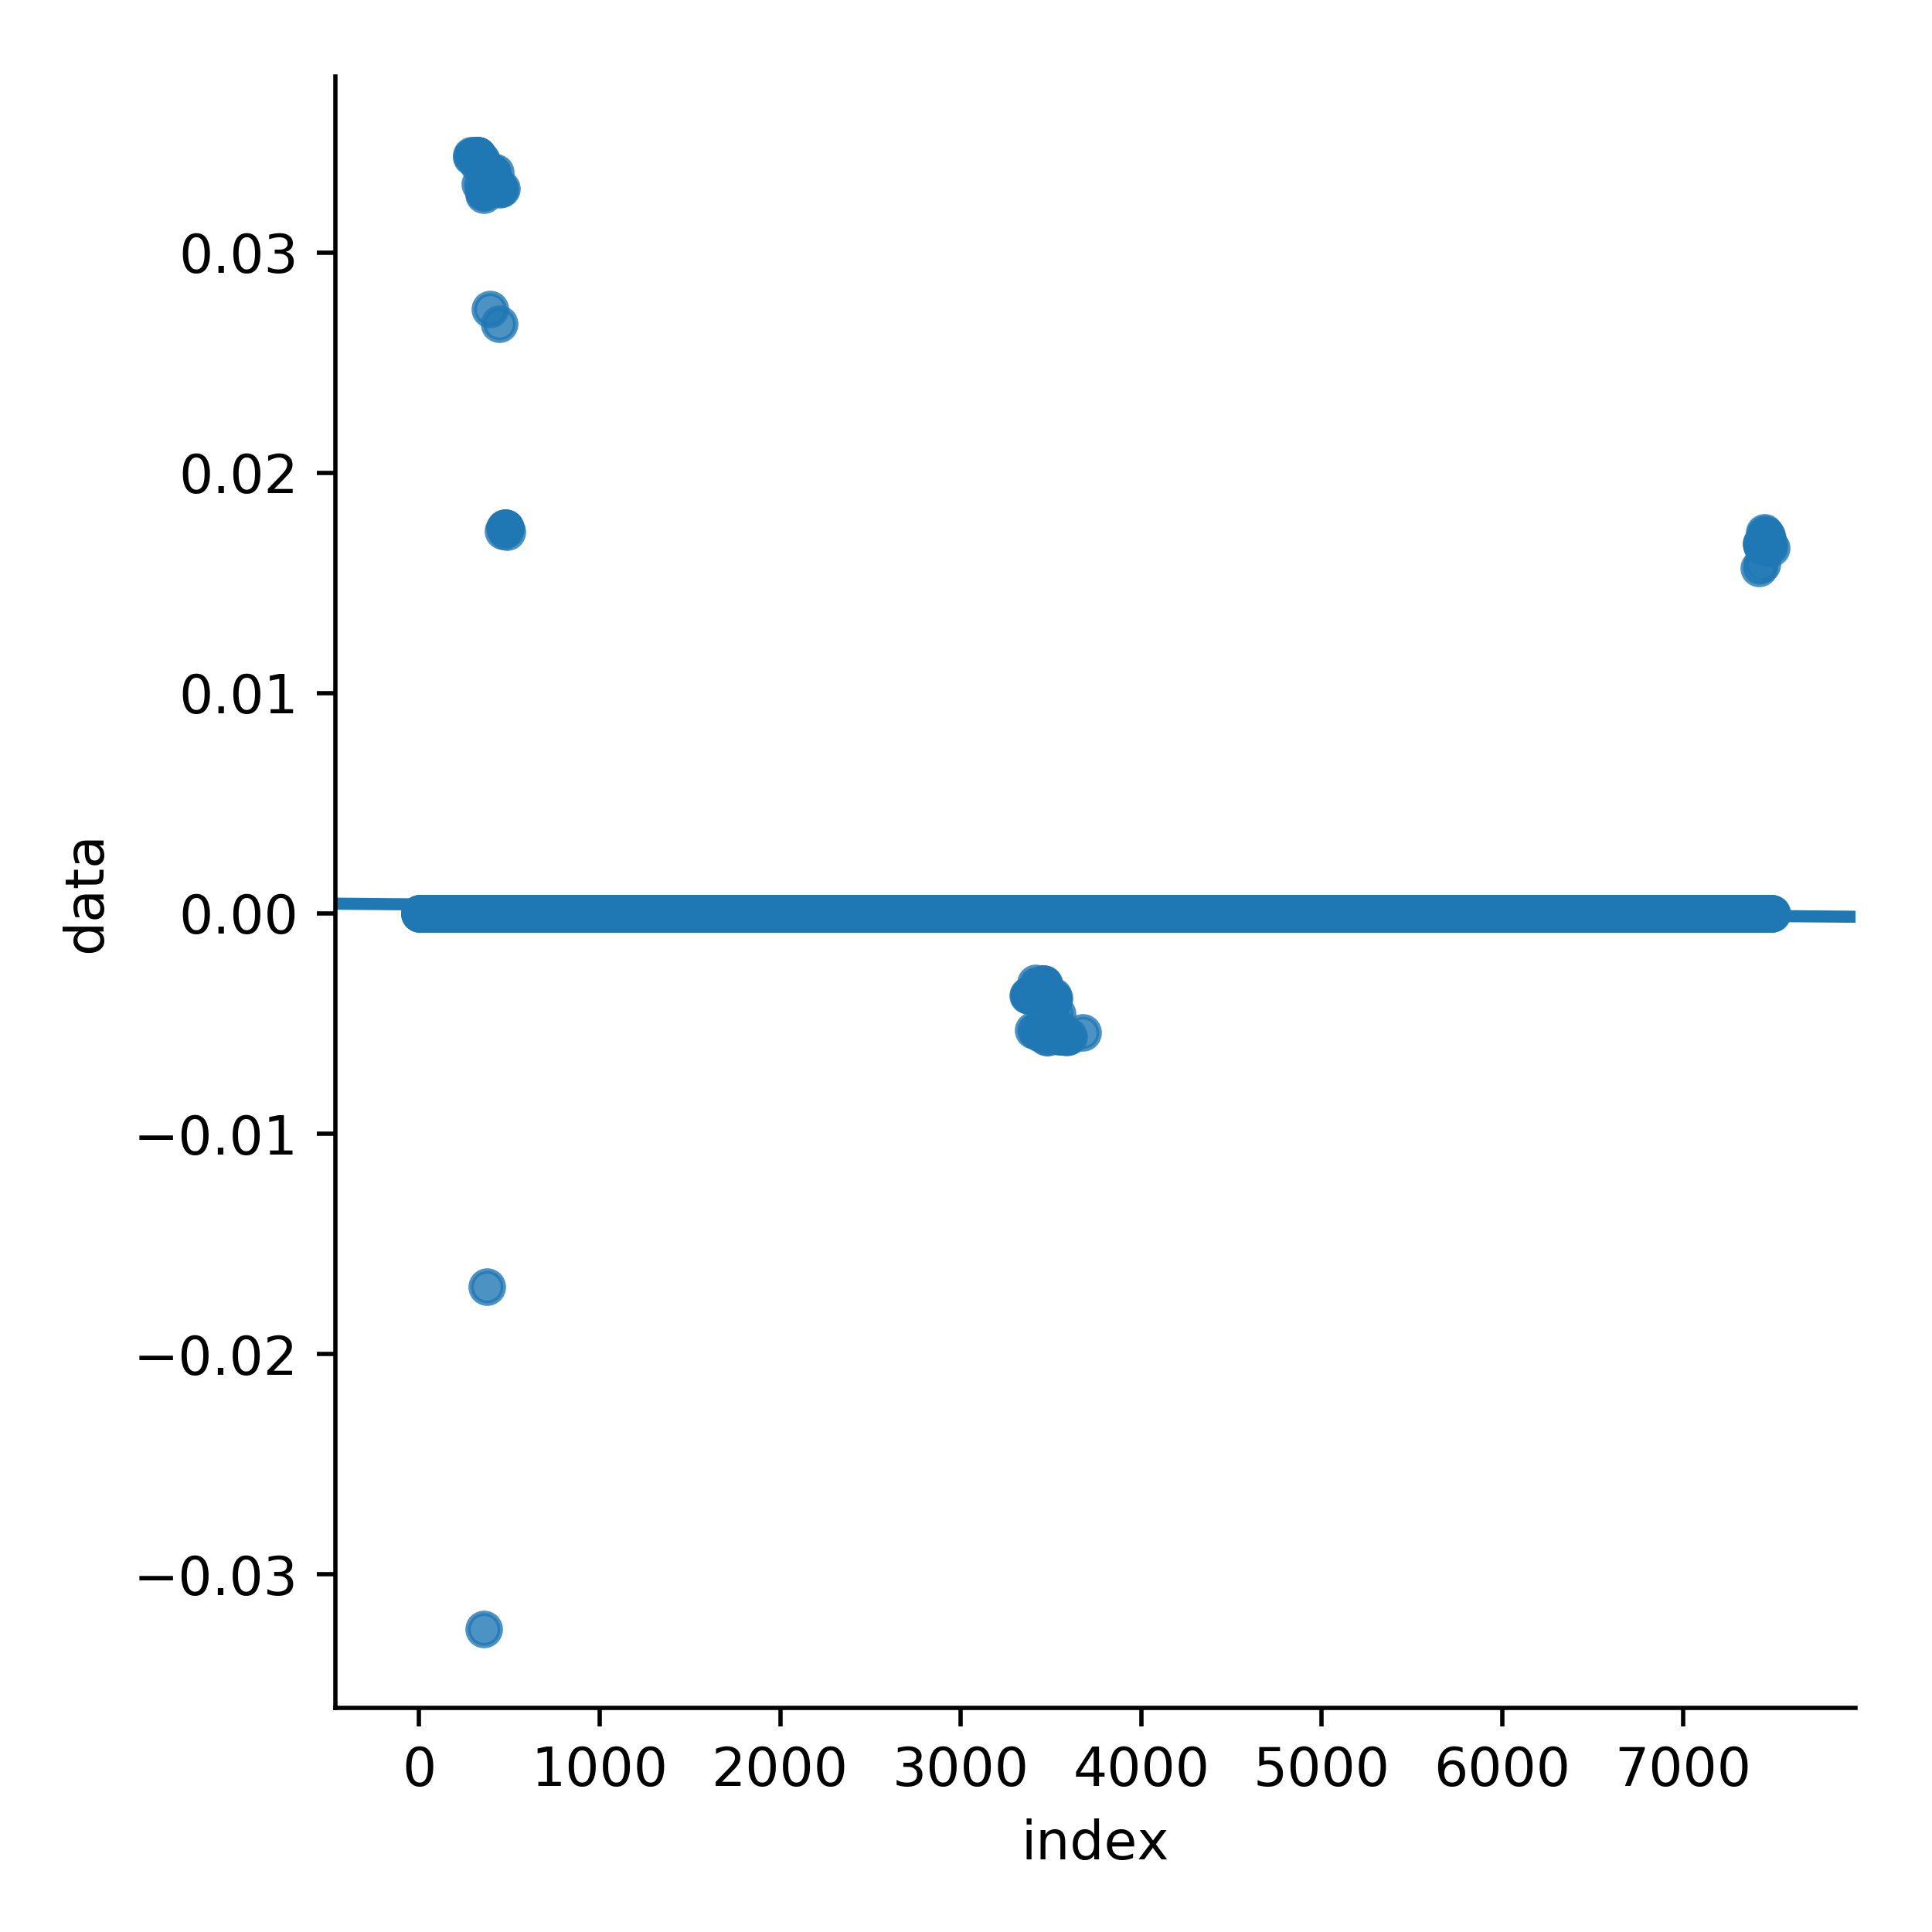

In [27]:
%expand
%preview {cwd}/sim1.bpost2.png
data.plot_B(model.post_mean_mat[:,1], '{cwd}/sim1.bpost2.png')

## Compare with `varbvs`

In [35]:
X = data.X
Y = data.Y

In [ ]:
%get X Y --from python3

In [ ]:
n <- nrow(X)
p <- ncol(X)
set.seed(1)
varbvs_fit1 <- varbvs::varbvs(X,NULL, Y[,1],verbose = FALSE)
varbvs_bhat1 = rowSums(varbvs_fit1$alpha*varbvs_fit1$mu)
varbvs_fit2 <- varbvs::varbvs(X,NULL, Y[,2],verbose = FALSE)
varbvs_bhat2 = rowSums(varbvs_fit2$alpha*varbvs_fit2$mu)
varbvs_bhat1 = as.vector(varbvs_bhat1)
varbvs_bhat2 = as.vector(varbvs_bhat2)

In [ ]:
%get varbvs_bhat1 varbvs_bhat2 --from R

In [ ]:
%expand
%preview {cwd}/sim1.varbvs1.png
data.plot_B(varbvs_bhat1, '{cwd}/sim1.varbvs1.png')

In [ ]:
%expand
%preview {cwd}/sim1.varbvs2.png
data.plot_B(varbvs_bhat2, '{cwd}/sim1.varbvs2.png')